# **Analise dos Dados do Airbnb - Rio de Janeiro**

A Airbnb surgiu em 2008 com o objetivo de juntar anfitriões que buscavam anunciar o seu espaço e de viajantes que tinham o interesse de reservar acomodações baratas. Oferecendo uma plataforma inovadora para a hospedagem alternativa.

Depois de 10 anos de serviço, a Airbnb já conseguiu realizar mais de **300 milhões** de conexões entre anfitriões e viajantes!

A Airbnb disponibiliza dados em seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) que podem vir a ser utilizados para análises de dados.

Atualmente, o Inside Airbnb disponibiliza dados apenas da cidade do Rio de Janeiro no Território Brasileiro. E nossa análise se baseará nessa cidade.

## Obtenção dos Dados

Os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será utilizado o arquivo 

*   listings.csv



In [1]:
#Importação das Bibliotecas Necessárias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importação do arquivo "listings.csv" pelo site do Airbnb:
arquivo = "https://raw.githubusercontent.com/GabrielTrentino/Projetos-de-Cursos/master/03-DSNP/01_listings(RIO).csv"
df = pd.read_csv(arquivo)

## Análise dos Dados

Beleza, entendemos um pouco do historico da Airbnb e da área de atuação. Mas e agora?

Ao importarmos as bibliotecas e o arquivo ".csv" da pagina deles, temos que ver e descrever quais variáveis estão presentes nesse arquivo:

**Dicionário das Variáveis:**
*   id - Número de identificação do imóvel;
*   name - Nome da propriedade Anunciada;
*   host_id - Número do Anfitrião;
*   host_name - Nome do Anfitrião;
*   neighbourhood_group - Coluna ausente de valores;
*   neighbourhood - Nome do Bairro;
*   latitude - Coordenada da Latitude;
*   longitude - Coordenada da Longitude;
*   room_type - Tipo de Propriedade/Quarto;
*   price - Preço para alugar o imóvel;
*   minimum_nights - Quantidade miníma de dias para reservar;
*   number_of_reviews - Número de reviews de uma propriedade;
*   last_review - Ultima data do Review;
*   reviews_per_month - Quantidade de Reviews por mês;
*   calculated_host_listings_count - Quantidade de imóveis que um mesmo anfitrião possui;
*   availability_365 - Quantidade de dias que o imóvel ficou disponível nos ultimos 365 dias;



Sempre que precisarmos, voltaremos à esse dicionário para darmos um norte à nossa análise. Agora, vamos ver os primeiros 5 termos do nosso DataFrame com a função "head()"


In [3]:
#Mostrando as primeiras 5 entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,332,4,243,2019-11-11,2.13,1,303
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,235,2019-10-08,2.04,3,119
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,273,2,271,2019-11-21,2.38,1,88
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,378,2,169,2019-11-13,2.28,1,85
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,2019-11-16,2.84,1,128


Show, visto as primeiras linhas do nosso DataFrame, podemos perceber um pequeno problema! A coluna neighbourhood_group não possui uma variável sequer!

Será que há outra varíavel também que possue valores ausentes? Vamos verificar com a função "info()".

In [4]:
#Visualizando a composição do DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33715 non-null  int64  
 1   name                            33654 non-null  object 
 2   host_id                         33715 non-null  int64  
 3   host_name                       33695 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   33715 non-null  object 
 6   latitude                        33715 non-null  float64
 7   longitude                       33715 non-null  float64
 8   room_type                       33715 non-null  object 
 9   price                           33715 non-null  int64  
 10  minimum_nights                  33715 non-null  int64  
 11  number_of_reviews               33715 non-null  int64  
 12  last_review                     

## **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Ao percerbemos um pouco sobre como está o nosso DataFrame, nos chega a pergunta: Quantas linhas e quantas colunas temos?

*   Linhas = Entradas
*   Colunas = Variáveis

E qual o tipo de dado para cada variável?

In [5]:
#Visualizando as Dimensões do DataFrame
print("No nosso DataFrame, possuimos {} entradas e {} variáveis\n".format(df.shape[0], df.shape[1]))

#Tipos de Variáveis no DataFrame
print("Variável\t\t\tTipo de variável")
display(df.dtypes)

No nosso DataFrame, possuimos 33715 entradas e 16 variáveis

Variável			Tipo de variável


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **Q2. Qual a porcentagem de valores ausentes no dataset?**

Durante a fase exploratória sempre é interessante analisar a consistência do nosso banco de dados. E como vimos anteriormente, temos uma coluna inteira sem um único valor. E a pergunta que fica é: Há alguma outra variável que tambem possui valores ausentes? Será que essa ausência afeta nossas futuras análises?

In [6]:
#Odernação em ordem decrescente de % das variáveis que possuem valores ausentes:
(df.isnull().sum()/df.shape[0]*100).round(2).sort_values(ascending = False)

neighbourhood_group               100.00
reviews_per_month                  43.20
last_review                        43.20
name                                0.18
host_name                           0.06
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
id                                  0.00
dtype: float64

Hmm, certo. O codigo acima nos mostrou que:
*   100.00% da variável neighbourhood_group possue valores ausentes.
*   43.20% da variável reviews_per_month possue valores ausentes.
*   43.20% da variável last_review possue valores ausentes.
*   0.18% da variável name possua valores ausentes.

Bom, se olharmos nosso Dicionário acima, podemos ver que essas variáveis talvez não possuem grande relevância para uma análise inicial. Por isso, removeremos apenas essa variável "neighbourhood_group".

## **Q3. Qual o tipo de distribuição das variáveis?**

Para visualizar a presença de Outlier no nosso DataSet, vou usar a função "describe" e, em seguida, plotar um histograma para vermos como que está a nossa distribuição. 

Para que assim, possamos procurar possíveis Outliers que poderão prejudicar nossa análise.

Outlier - É um valor atípico na nossa distribuição, que apresenta uma inconsistencia. "Um ponto fora da curva".

In [7]:
df[["price","minimum_nights","number_of_reviews", "reviews_per_month","latitude","longitude"]].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,latitude,longitude
count,33715.00,33715.00,33715.00,19149.00,33715.00,33715.00
mean,651.86,4.79,9.37,0.71,-22.97,-43.25
std,1695.45,22.64,24.82,0.93,0.04,0.10
min,0.00,1.00,0.00,0.01,-23.07,-43.74
25%,151.00,1.00,0.00,0.11,-22.98,-43.32
50%,290.00,2.00,1.00,0.34,-22.97,-43.20
75%,600.00,4.00,6.00,0.98,-22.95,-43.19
max,41982.00,1123.00,372.00,10.08,-22.75,-43.10


Opa, de cara ja podemos notar um pequeno problema! Os preços estão com uma distribuição onde 75% dos valores vão até 600.00 e o valor máximo vai até 41982.00! **Isso é um exemplo nítido de Outlier**. O que mais enxergamos?

*   **minimum_nights** salta de 4 noites para 1123 noites (Outlier?)
*   **number_of_reviews** salta de 6 avaliações para 372 avaliações (Outlier?)
*   **reviews_per_month** salta de 0.98 para 10.08 (Outlier?)
*   **Latitude** e **Longitude** não tiveram variações abruptas, isso demonstra que os anfitriões estão realmente na região do Rio de Janeiro.


Certo, antes de fazer qualquer remoção ou alteração no DataFrame, vamos ver como que estão distribuidas essas variáveis:

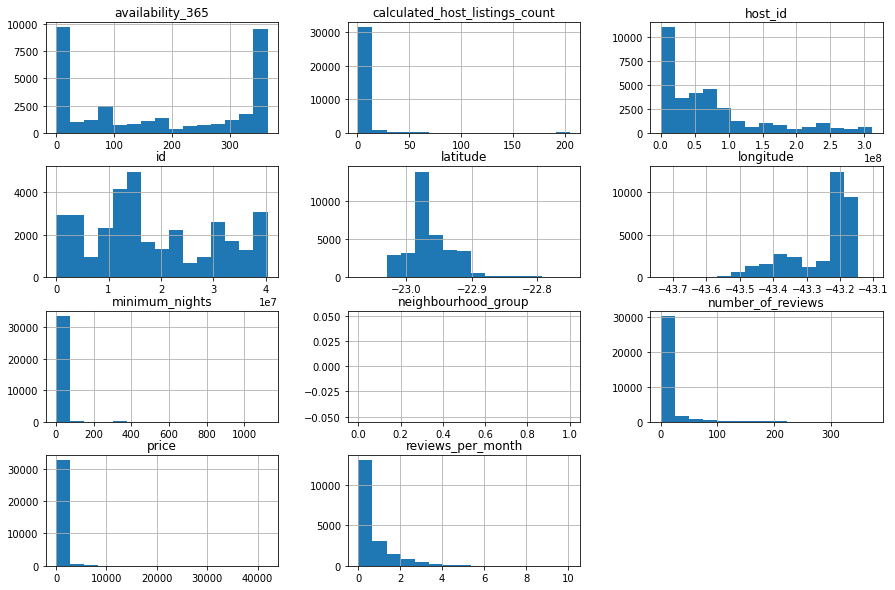

In [8]:
df.hist(bins = 15, figsize = (15,10));

## **Q4. Há Outliers Presentes?**

Como você pode ter visto anteriormente, vemos que a variável **price** e **minimum_nights** possui uma distribuição esquisita. Porque?

A variável possui a maior quantidade de valores entre 0 a 1000 reais! Mas há acomodações com valores acima de 43000 reias! Isso indica uma disparidade ou inconsistência dos dados.

Assim como a variável **price** possui suas inconsistências, vemos que **minimum_nights** também possue, isso porque é comum buscar acomadações com uma duração minima entre 2 a 4 dias, certo? Mas o gráfico demonstra que há acomodações com a duração minima acima de 1000 dias.

Sabendo dessa bagunça distributiva, o que podemos fazer? Vamos definir nosso "Público Alvo" para a nossa análise, isto é, **definir os anfitriões padrões que o Airbnb tem.**

Para isso, vamos analisar o Boxplot da variável **price** e ver se esse valor tambem possue esse comportamento nos demais setores do Rio de Janeiro.

### Boxplot de Price:

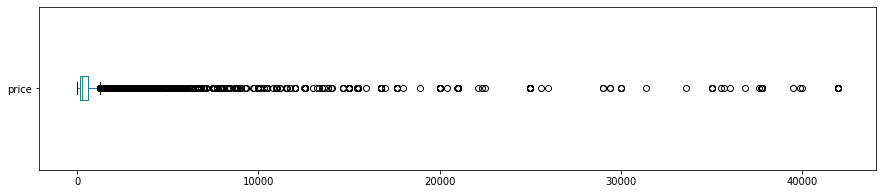


Valores acima de 2000:
1586 entradas
4.7041%


In [9]:
df.price.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

print("\nValores acima de 2000:")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

### Variação do Price de acordo com a Vizinhança (Neighbourhood):

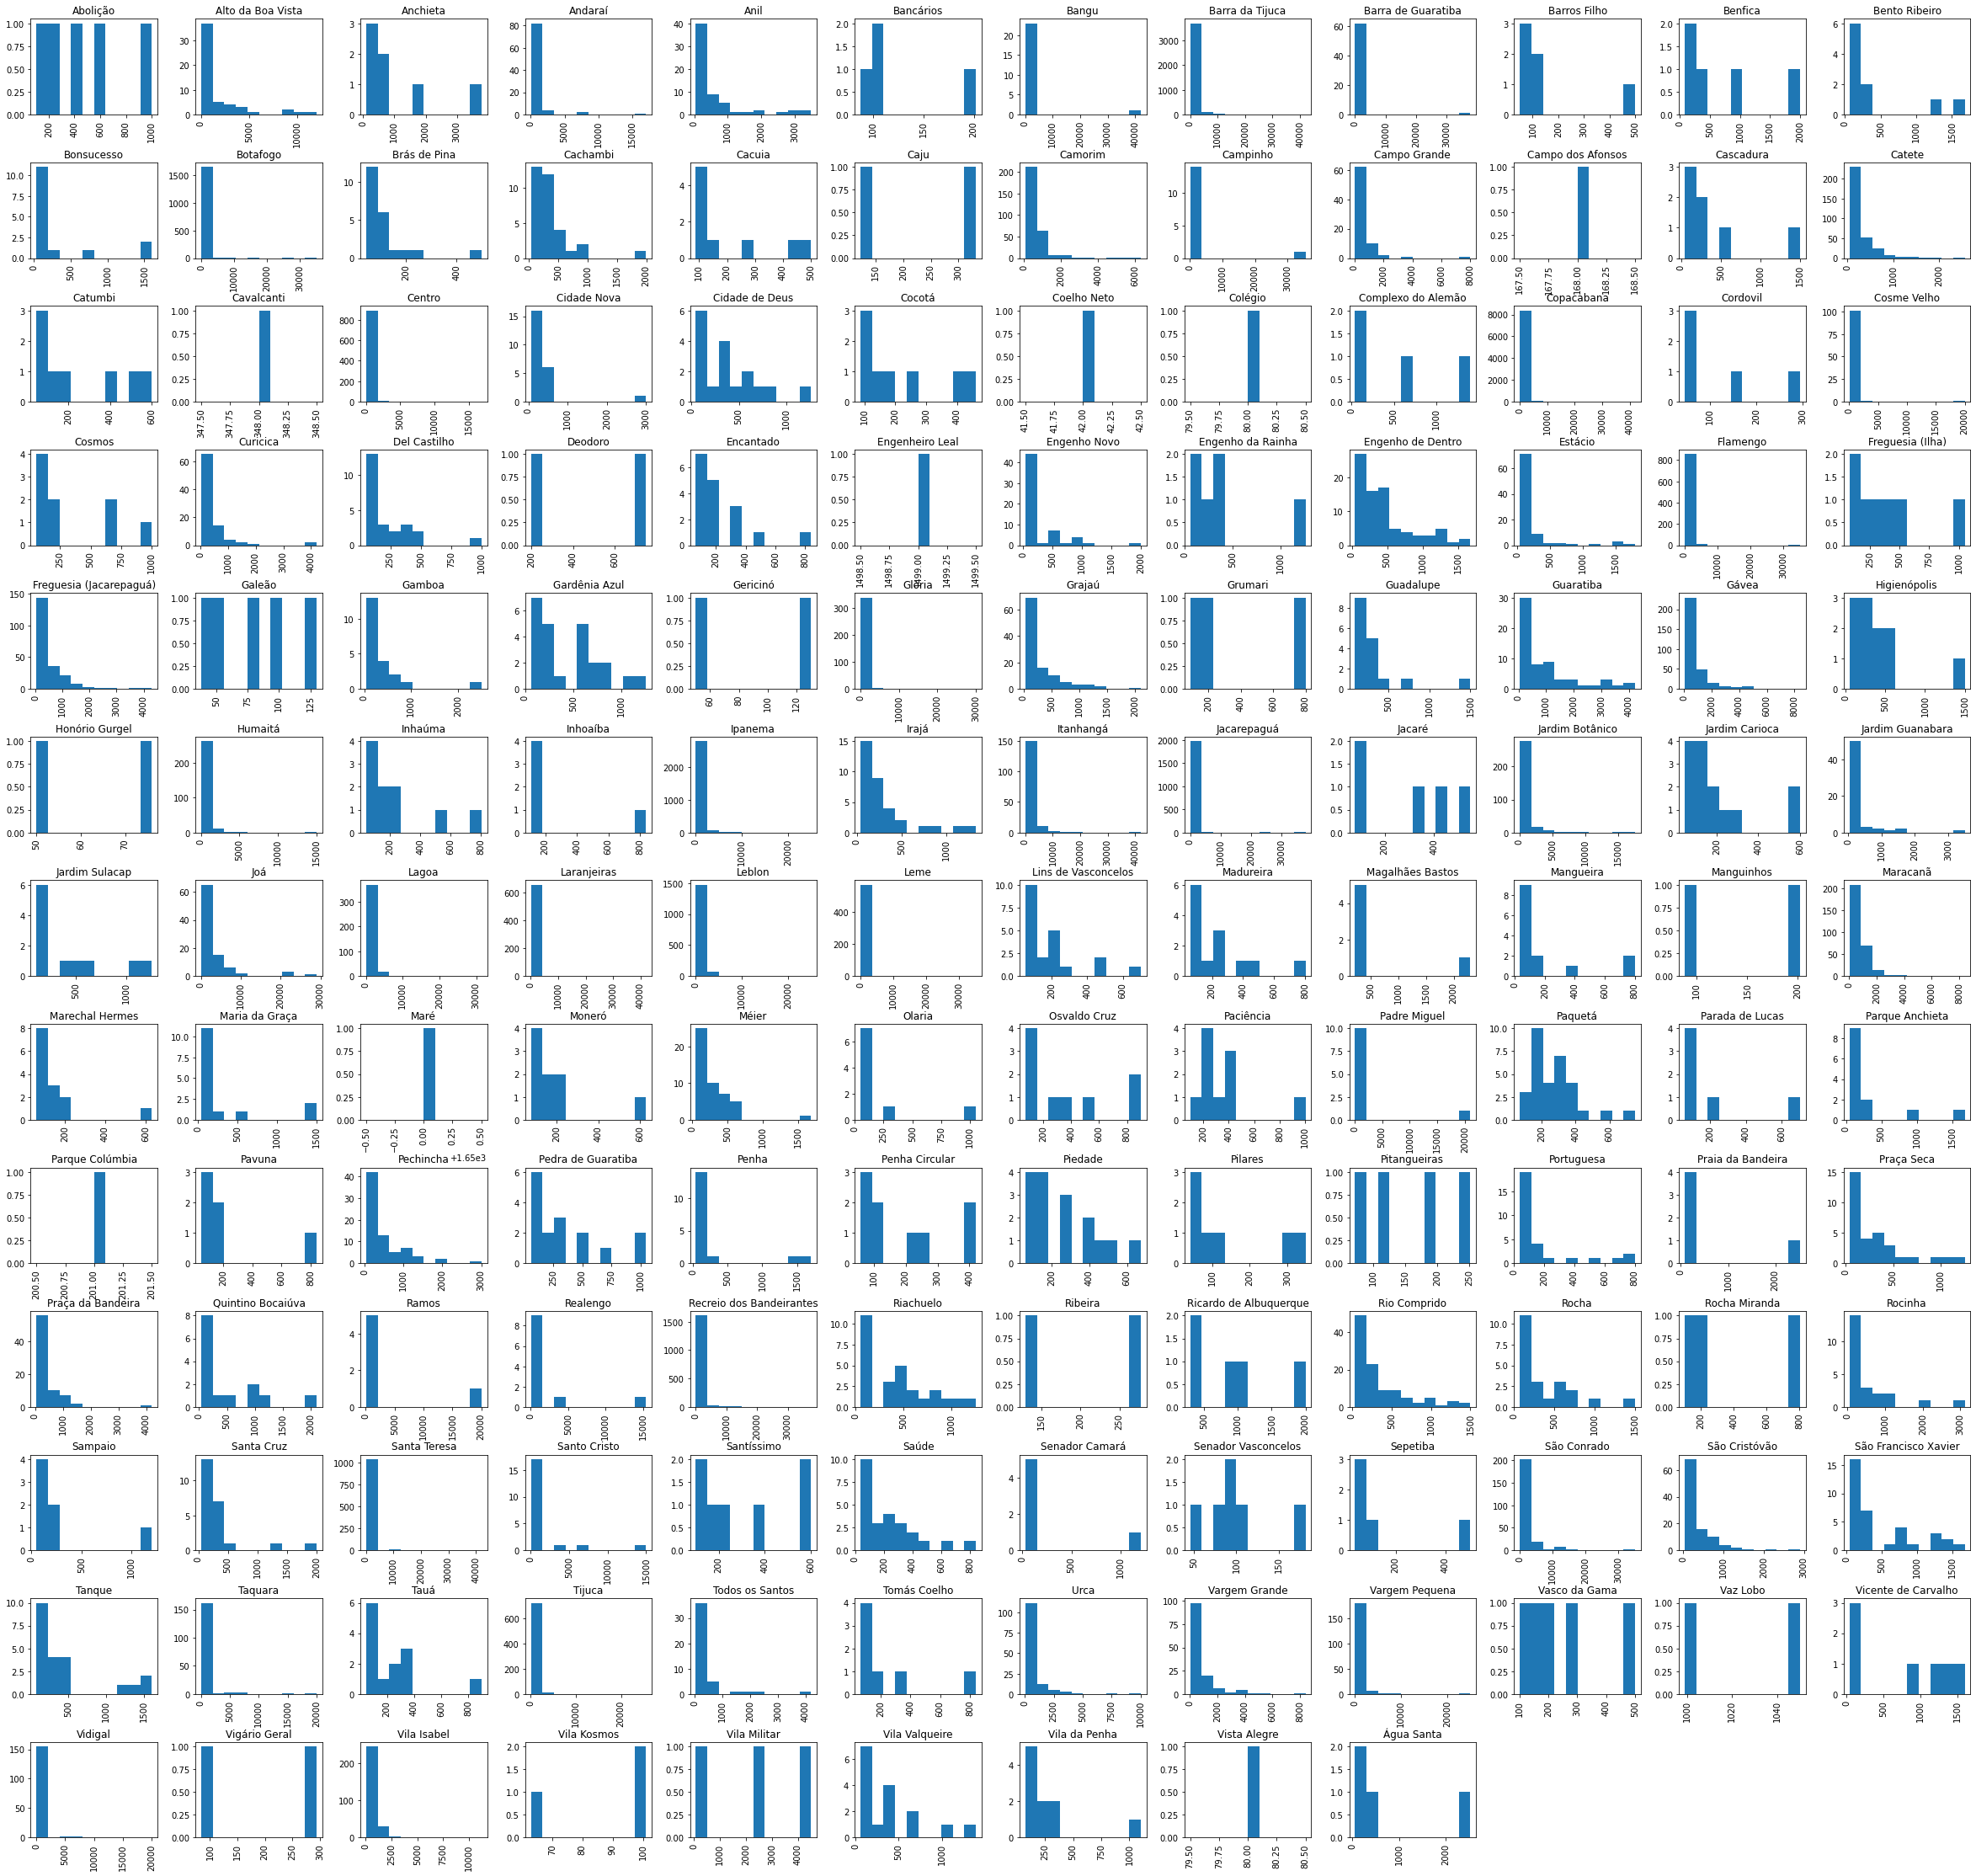

In [10]:
df_teste = df[["price", "neighbourhood"]]
df_teste.hist(by=df_teste["neighbourhood"], figsize = (40,40));

O objetivo de Plotar esse gráfico é identificar os setores do Rio de Janeiro onde possuem maior preço para a acomodação e, ao mesmo tempo, verificar a distribuição. **Pois pode acontecer de quando fizermos um "limpa", notarmos que setores agem de forma diferente ao padrão da cidade.**

E o gráfico mostrou que não, **até Copacabana possui uma distribuição irregular de preços**. Esperavamos que a maioria das acomodações lá fossem com um preço mais elevado.

### Boxplot de Minimum_nights:

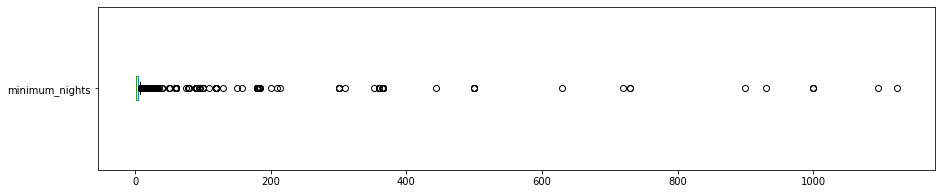


Valores acima de 16:
938 entradas
2.7821%


In [11]:
df.minimum_nights.plot(kind='box', vert= False, figsize = (15,3))
plt.show()

print("\nValores acima de 16:")
print("{} entradas".format(len(df[df.minimum_nights > 16])))
print("{:.4f}%".format((len(df[df.minimum_nights > 16]) / df.shape[0])*100))

### Boxplot de Calculated_host_listings_count:

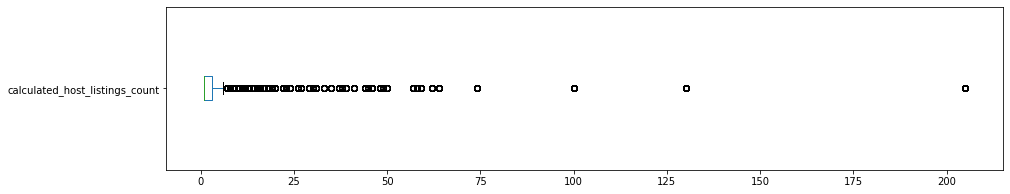


Valores acima de 10:
2992 entradas
8.8744%


In [12]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("\nValores acima de 10:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 10])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 10]) / df.shape[0])*100))

### Resumo:

In [13]:
#Verificando Possíveis Outliers:
preco_0 = np.sum(df["price"] == 0)
preco_x = np.sum(df["price"] > 2000)
print("Para a Variável Price:")
print("Temos {} entradas com valor 0 que representam {}%".format(preco_0, (preco_0/df.shape[0]*100).round(3)))
print("Temos {} entradas com valor acima de 2000 que representam {}%".format(preco_x, (preco_x/df.shape[0]*100).round(3)))

minimo_noite = np.sum(df["minimum_nights"] > 16)
print("\nPara a Variável minimum_nights:")
print("Temos {} entradas onde o minimo de noites passa de 16, correponde a {}%".format(minimo_noite, (minimo_noite/df.shape[0]*100).round(3)))

calculated_maior10 = np.sum(df["calculated_host_listings_count"] > 10)
print("\nPara a Variável calculated_host_listings_count:")
print("Temos {} anfitriões com mais de 10 casas, corresponde a {}%".format(calculated_maior10, (calculated_maior10/df.shape[0]*100).round(3)))

Para a Variável Price:
Temos 7 entradas com valor 0 que representam 0.021%
Temos 1586 entradas com valor acima de 2000 que representam 4.704%

Para a Variável minimum_nights:
Temos 938 entradas onde o minimo de noites passa de 16, correponde a 2.782%

Para a Variável calculated_host_listings_count:
Temos 2992 anfitriões com mais de 10 casas, corresponde a 8.874%


Com a análise gráfica acima, notamos a presença de inúmeros Outliers que podem vir a ser prejudicial na acurácia futura. Para isso, eliminamos eles e consideramos que o nosso Público Alvo será:
*    Acomodações acima de 2000 não farão parte;
*    O Minimo de Noites não ultrapassará o valor de 16 dias;
*    O Anfitrião possuirá até 10 propriedades;

Assim, podemos fechar um Funil e tornar essa pesquisa mais precisa. E se no futuro, precisarmos alterar algo, nos voltaremos nessa linha de código!

### Correção do DataFrame:

In [14]:
df_clean = df.copy()

#Removendo preços acima de 3000 e igual a 0;
df_clean.drop(df_clean[df_clean.price > 2000].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis = 0, inplace = True)

#Removendo números acima de 10 minimos de noites;
df_clean.drop(df_clean[df_clean.minimum_nights > 16].index, axis = 0, inplace = True)

#Removendo calculated_host_listings_count acima de 10:
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 10].index, axis = 0, inplace = True)

#retirando a variavel 'neighbourhood_group' pois está vazia:
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

#Comparando o DataFrame Original com o Corrigido:
porcentagem = df_clean.shape[0]/df.shape[0]*100
print("Antes da correção, tinhamos {} entradas, agora temos {} entrads".format(df.shape[0], df_clean.shape[0]))
print("O novo DataFrame possui {}% dos dados do Antigo DataFrame".format(round(porcentagem,2)))


Antes da correção, tinhamos 33715 entradas, agora temos 28537 entrads
O novo DataFrame possui 84.64% dos dados do Antigo DataFrame


Interressante, ao corrigir o DataFrame, perdemos aproximadamente 15.36% dele. Mas o quanto mais preciso estaremos em detrimento dessas correções? Essas e outras perguntas podem ser pesquisadas à fundo.

### Histogramas Sem Outliers:

Ao corrigir o DataFrame, podemos ver como que está a distribuição:

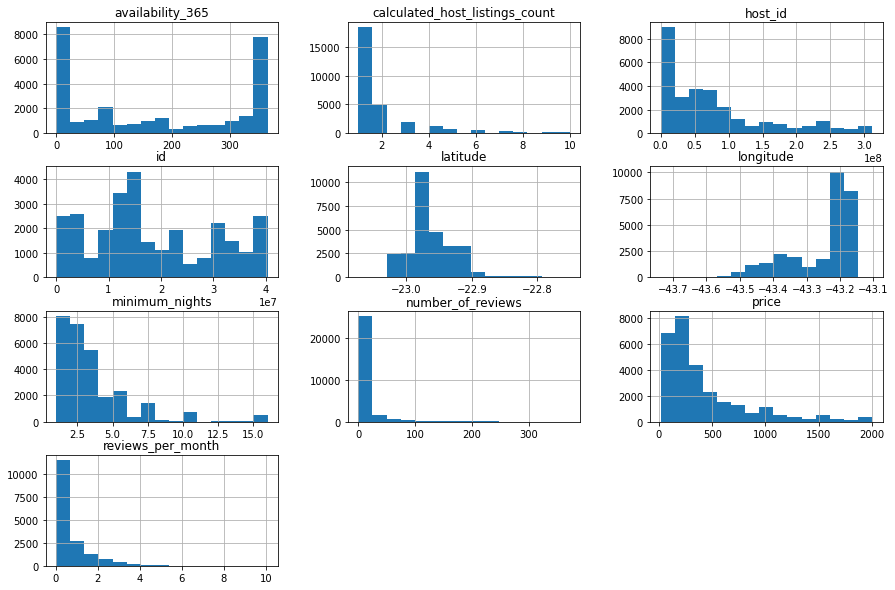

In [15]:
df_clean.hist(bins = 15, figsize = (15,10));

O Número de Reviews e o Número de Reviews por Mês não possuem nosso interesse por agora. Talvez eles se tornarão importantes após um tempo.

## **Q5. Qual a correlação existente entre as variáveis**

Uma das possíveis formas de verificar se a nossa correção teve melhoria é através da correlação. No primeiro momento, vamos ver a correlação das variáveis do nosso antigo DataFrame. E, em seguida, iremos ver a correlação do DataFrame corrigido.

In [16]:
df[["price","minimum_nights","number_of_reviews", "reviews_per_month",
    'calculated_host_listings_count', 'availability_365']].corr().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.00,0.03,-0.09,-0.10,0.02,-0.01
minimum_nights,0.03,1.00,-0.03,-0.04,-0.01,0.01
number_of_reviews,-0.09,-0.03,1.00,0.58,-0.03,0.02
reviews_per_month,-0.10,-0.04,0.58,1.00,-0.02,-0.03
calculated_host_listings_count,0.02,-0.01,-0.03,-0.02,1.00,0.09
availability_365,-0.01,0.01,0.02,-0.03,0.09,1.00


In [17]:
correlacao = df_clean[["price","minimum_nights","number_of_reviews", "reviews_per_month"
            , 'calculated_host_listings_count', 'availability_365']].corr().round(2)
correlacao

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.00,0.25,-0.17,-0.18,-0.14,-0.02
minimum_nights,0.25,1.00,-0.10,-0.17,-0.08,-0.05
number_of_reviews,-0.17,-0.10,1.00,0.58,0.09,0.03
reviews_per_month,-0.18,-0.17,0.58,1.00,0.03,-0.03
calculated_host_listings_count,-0.14,-0.08,0.09,0.03,1.00,0.13
availability_365,-0.02,-0.05,0.03,-0.03,0.13,1.00


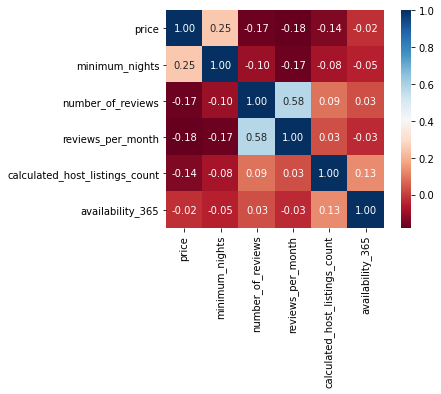

In [18]:
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Pelo que podemos observar pelo HeatMap, vemos que:
*   O preço aumenta a medida que o número minimo de noites aumenta.
*   Quanto mais casas o Anfitrião tiver, menor será o preço.
*   Vemos que o número de Reviews afeta diretamente no baratemaneto da propriedade, será as pessoas fazem Review de propriedades baratas?

## **Q6. Qual o tipo de imóvel mais alugado no Rio?**

Essa é uma outra pergunta que podemos fazer, pois afinal: que tipo de imóvel é mais disponibilizado para a acomodação no Rio?

In [19]:
df_clean.room_type.value_counts()

Entire home/apt    19405
Private room        8308
Shared room          633
Hotel room           191
Name: room_type, dtype: int64

E Quanto desses tipos de acomodações representam do todo?

In [20]:
print("Tipo de Quarto\t\t%")
print(df_clean.room_type.value_counts()/df_clean.shape[0]*100)

Tipo de Quarto		%
Entire home/apt    67.999439
Private room       29.113081
Shared room         2.218173
Hotel room          0.669307
Name: room_type, dtype: float64


## **Q7. Qual a localidade mais cara no Rio?**

Aqui devemos ter bastante cuidado, pois esperamos que Setores como Copacabana costumam ser os mais chamativos em relação ao preço.

In [21]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2)[:10]

neighbourhood
Maré                      1650.00
Engenheiro Leal           1499.00
Vaz Lobo                  1024.50
Ricardo de Albuquerque     911.00
Vicente de Carvalho        883.67
Benfica                    715.40
Joá                        590.04
Anchieta                   584.83
Guaratiba                  567.35
Barra da Tijuca            561.84
Name: price, dtype: float64

Mas o setor que teve o maior custo foi Maré, mas porque?

In [22]:
print(df[df.neighbourhood == "Maré"].shape)

(1, 16)


Aqui vemos o porque! Vemos que existe apenas uma propriedade em Maré, tornando essa análise imprecisa para esse momento.

O que podemos fazer? 
*   Podemos tirar setores que apresentam até 3 propriedades, assim torna mais verossimil a análise de custo.
*   Considerar nessa análise apenas os 10 setores que mais possuem cadastros, tornando-o mais preciso.

## **Q8. Como estão distribuidos os imóveis?**

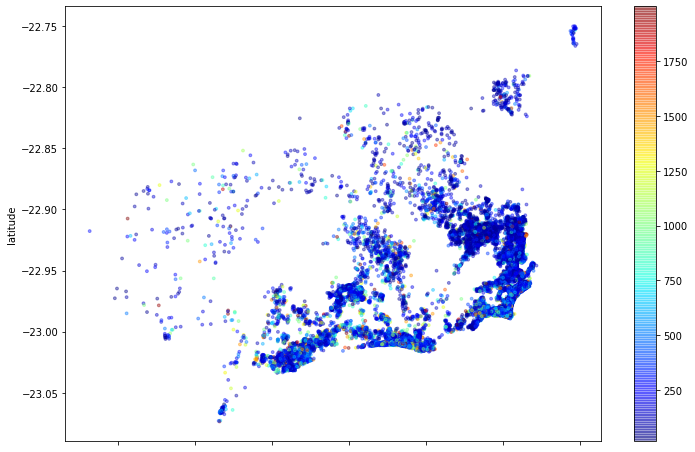

In [23]:
df_clean.plot(kind="scatter", x="longitude", y="latitude",alpha =0.4,
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

# Conclusões

Essa é uma análise exploratória de um conjunto de dados disponibilizado para InsideAirbnb, para isso precisamos tratar nosso DataFrame para que podemos usufruir melhor.

Vimos também que a pouca quantidade de imóveis em determinados setores geram uma distorção, mostrando que quanto mais entradas disponíveis, mais informações podem ser extraídas.

Podemos especular novas hipóteses para análises futuras, como:
*   Porque que as pessoas fazem mais reviews para propriedades mais baratas? Será porque elas são mais alugadas? O viajante se sente mais disposto para deixar uma avaliação?

Lembrando que esse dataset possui apenas 16 variáveis, ideal para analises iniciais, mas há uma outra opção de dataset disponibilizado pela InsideAirbnb que contem 106 variáveis! Sendo essa segunda opção necessária para uma análise exploratória completa!
